# Identifying Coronary Heart Disease (@ Calgary Public Library Project-based Hackathon)
## Faraz Hosseinian-Tehrani and Ryan Saloff

## 1. Introduction

Predicting cases of coronary heart disease through data analysis is crucial for making proper diagnoses. According to the World Health Organization (WHO), in 2020, the worldwide leading cause of death was coronary heart disease
<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1). Improvements to the prediction accuracy have the potential to improve and save lives, with more effective treatments being possible. Furthermore, a prediction based on a patient's health history is often required to conduct further tests to determine the prescence of heart disease. (add a source)


We are performing a predictive data anlysis to predict the presence of heart disease in patients. We are using a dataset<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2) from the UC Irvine Machine Learning Repository that has 14 health attributes from patients, including their heart disease diagnosis. Approximately half of the patients were diagnosed with heart disease.

## 1.1 Methods

Our data analysis was conducted in Python. The dataset was read from the web using `read_csv()` from `pandas` and then visualized using functions from `matplotlib` and `seaborn`.

Four different models were trained on the heart disease dataset<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2) from UC Irvine. These methods include the following:

- Logistic Regression
- Neural Network
- SVM
- Random Forest

More information about the model specifications is provided in Section 3.

Our heart disease dataset is split using `train_test_split()` from `scikit-learn`, in which we designated 30% of the data to the testing set and 70% to the training set.

Once each model has been trained using the training set, we evaluate the accuracy of each of the four models’ predictions using the testing set. Furthermore, we used `metrics.accuracy_score()` from `scikit-learn` to report the results. Afterwards, we created a confusion matrix to view the number of true positives, true negatives, false positives, or false negatives. This confusion matrix was generated using functions from `scikit-learn`, `numpy`, `matplotlib`, and `pandas`.

## 1.2 Libraries

To load data and create plots, we will use `numpy`, `matplotlib`, `pandas`, and `seaborn`. Our models will be constructed using `scikit-learn`.

In [1]:
# Import libraries
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

## 2. Preliminary Data Analysis

### 2.1 Wrangling

In [4]:
# Load the data
url = "https://docs.google.com/spreadsheets/d/1nAODOWujVLMHhP-CnCucjX7p12lZNoMDfdtw5HsF5-Y/export?gid=1939341637&format=csv"
data = pd.read_csv(url)

# Remove rows with invalid values
data = data[(data['ca'] != 4) & (data['thal'] != 0)]

### 2.2 Previewing the Dataset

This dataset was retrieved from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease). It originally contains 76 attributes but has been reduced to a subset of 14:
- `age`: Age (in yrs)
- `sex`: Sex (1: Male, 0: Female)
- `trestbps`: Resting blood pressure at time of hospital admission (in mmHg)
- `chol`: Serum cholesterol (in mg/dl)
- `fbs`: Fasting blood sugar (1: over 120 mg/dl, 0: under 120 mg/dl)
- `restecg`: Resting electrocardiographic results (0: normal, 1: ST-T wave abnormality, 2: probable or definite left ventricular hypertrophy)
- `thalach`: Maximum heart rate achieved (in bpm)
- `exang`: Exercise induced angina (1: Yes, 0: No)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: The slope of the peak exercise ST segment (1: Upsloping, 2: Flat, 3: Downsloping)
- `ca`: Number of major vessels (0-3) coloured by fluoroscopy
- `thal`: 1 = Normal, 2 = Fixed defect, 3 = Reversable defect
- `target`: 1: Disease, 0: No disease

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
# Split the data into features and target label
y = data['target']
X = data.drop(['target'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### 2.3 Exploring the Dataset

In [7]:
# Count positive/negative heart disease cases
disease = data['target']

disease = disease.replace(0, 'negative').replace(1, 'positive')

disease.value_counts()

positive    508
negative    492
Name: target, dtype: int64

Text(0.5, 1.0, 'Heart Disease Diagnosis')

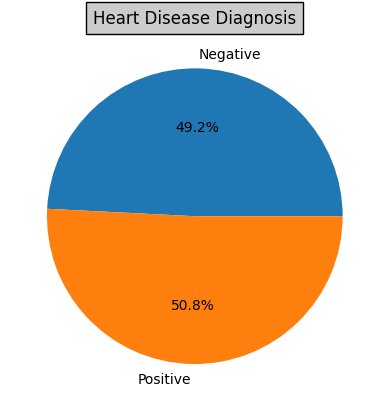

In [8]:
# Create table that groups individuals by heart disease diagnosis

disease_count = data.groupby(['target'])['target'].count()

# Create pie chart to visualize the heart disease diagnosis

labels = ('Negative', 'Positive')
fig, ax = plt.subplots()
ax.pie(disease_count, labels=labels, autopct='%1.1f%%')
plt.title("Heart Disease Diagnosis",
          bbox={'facecolor':'0.8', 'pad':5})

### 2.4 Pair Plot of Continuous Variables

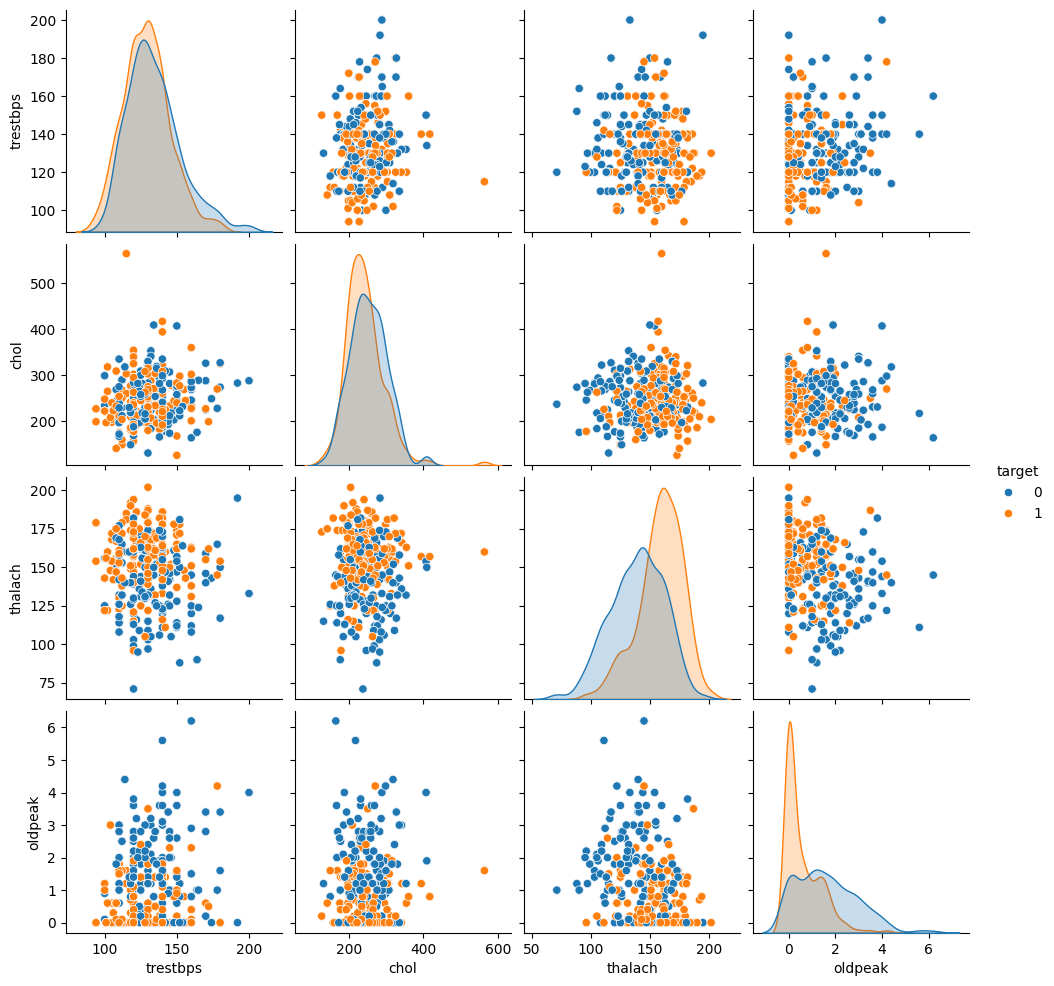

In [9]:
# Remove categorical variables from dataframe
continuous_variables = data[["trestbps", "chol", "thalach", "oldpeak", "target"]]

# Create pairplot
sns.pairplot(data=continuous_variables, hue="target")

## 3. Building Models

 The testing data is used to assess the accuracy of each model (% of correct predictions). Furthermore, a confusion matrix helps us to understand how many of the model's guesses were a true positive, true negative, false positive, or false negative.

### 3.1 Logistic Regression

Logistic regression is a binary classification model that is being used to make a prediction by fitting a logistic function with the dataset. A logistic model is designed making predictions about categorical variables with discrete data. In this case, patients are either predicted to have heart disease or not have heart disease. The model uses training data such as `age` and `sex` to evaluate the probability of an individual having heart disease.

In [10]:
# Build logistic regression model

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [11]:
  # Make predictions
y_predict = model.predict(X_test)

# Determine accuracy score
accuracy = sk.metrics.accuracy_score(y_test, y_predict)

# Format and print accuracy score
accuracy = str(round(accuracy * 100, 3))
print("Accuracy: " + accuracy + "%")

Accuracy: 87.0%


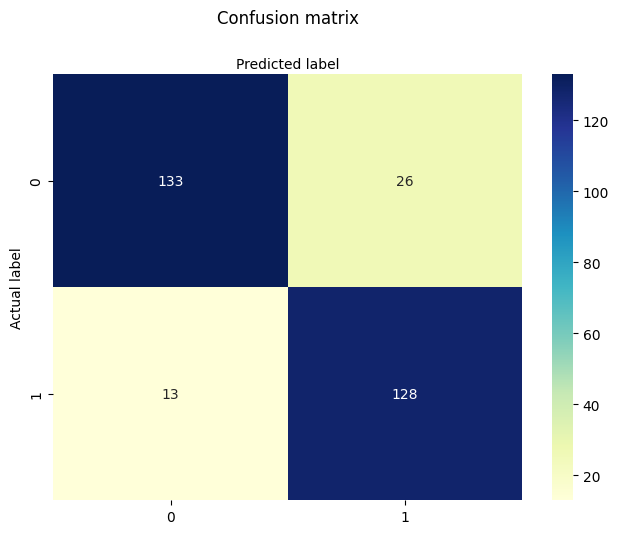

In [12]:
cnf_matrix_log = metrics.confusion_matrix(y_test, y_predict)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
(0.5,257.44,'Predicted label');




### 3.2 Neural Network model

A multi-layer perceptron (MLP) classifier is a type of feedforward artificial neural network, meaning that the information flows in one direction - from input to output - without any cycles. It consists of multiple layers of neurons, in which each neuron in a layer is connected to every neuron in the next layer, creating a network of interconnected nodes.

The classifier learns from training data, and adjusts internal weights and biases. Hidden layers process data between the input and output layers and enable the model to learn complex patterns. Each neuron uses an activation function to introduce non-linearity. Finally, the output layer generates the final predictions. Since this is a binary classification, there is one neuron with a sigmoid activation function.

In [13]:
# Build neural network model
model = MLPClassifier()
model.fit(X_train, y_train)

MLPClassifier()

In [14]:
# Make predictions
y_predict = model.predict(X_test)

# Determine accuracy score
accuracy = sk.metrics.accuracy_score(y_test, y_predict)

# Format and print accuracy score
accuracy = str(round(accuracy * 100, 3))
print("Accuracy: " + accuracy + "%")

Accuracy: 83.333%


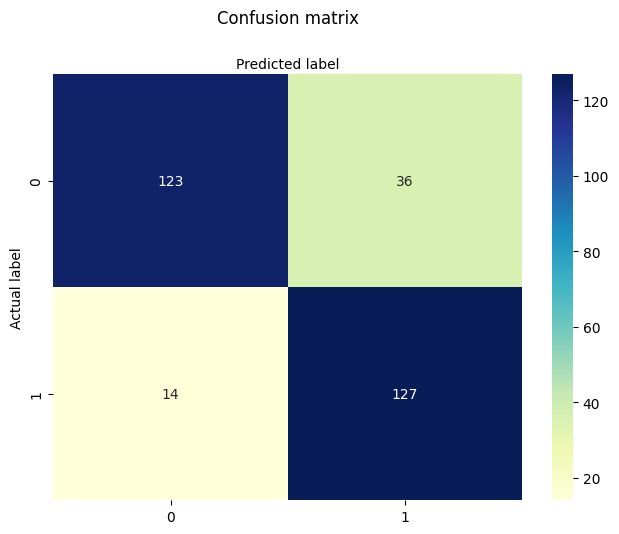

In [15]:
cnf_matrix_neural = metrics.confusion_matrix(y_test, y_predict)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_neural), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
(0.5,257.44,'Predicted label');

### 3.3 SVM model

A Support Vector Machine (SVM) model makes binary classification predictions by drawing a line that separates the strata. This line is drawn to optimize the space in each class so that new predictions will be classified accordingly. Data is classified based on where it lies relative to the line drawn by the SVM.

In [16]:
# Build SVM model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [17]:
# Make predictions
y_predict = model.predict(X_test)

# Determine accuracy score
accuracy = sk.metrics.accuracy_score(y_test, y_predict)

# Format and print accuracy score
accuracy = str(round(accuracy * 100, 3))
print("Accuracy: " + accuracy + "%")

Accuracy: 68.333%


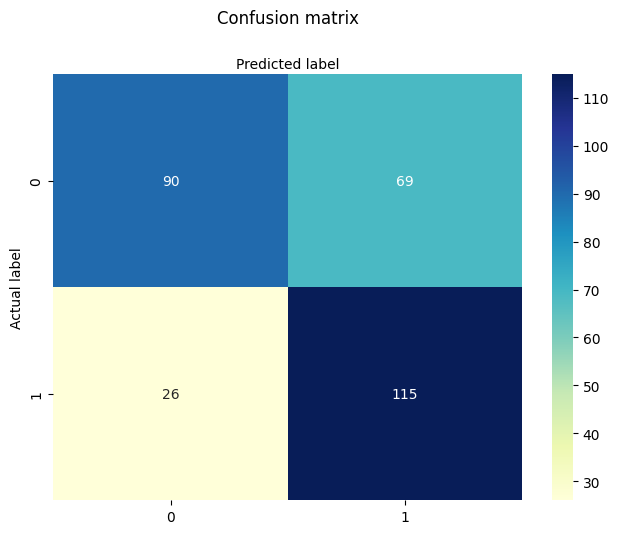

In [18]:
cnf_matrix_SVM = metrics.confusion_matrix(y_test, y_predict)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_SVM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
(0.5,257.44,'Predicted label');

### 3.4 Random Forest model

The random forest model is composed of multiple decision trees, where trees are trained on random subsets of the training data. This process is called bootstrapping, and it allows each tree to be exposed to slightly different patterns in the data. During prediction, each tree in the forest independently classifies the input data, then a final prediction is made based on the majority classification of the individual trees.

In [19]:
# Build random forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Make predictions
y_predict = model.predict(X_test)

# Determine accuracy score
accuracy = sk.metrics.accuracy_score(y_test, y_predict)

# Format and print accuracy score
accuracy = str(round(accuracy * 100, 3))
print("Accuracy: " + accuracy + "%")

Accuracy: 100.0%


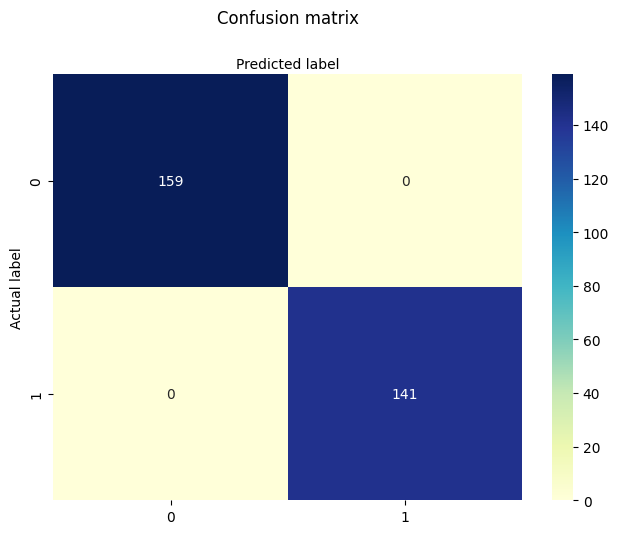

In [21]:
cnf_matrix_forest = metrics.confusion_matrix(y_test, y_predict)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_forest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
(0.5,257.44,'Predicted label');

Random forest achieved the highest accuracy out of our four selected models. To examine how much each attribute contributes to deciding whether or not the patient is positive for heart disease, we will create a feature importance plot.

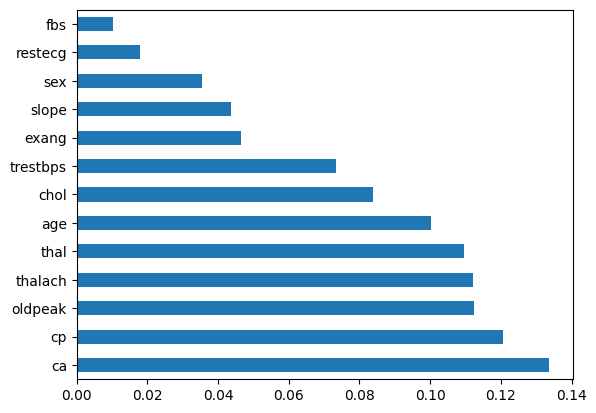

In [22]:
# Plot feature importance of random forest model
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(13).plot(kind='barh')
plt.show()

## 4. Discussion

The logistic regression model achieved an accuracy of **87%** when used to make predictions on the testing data. Logistic regression is considered a strong model for binary classification, so the high accuracy is likely due to the model's ability to detect linear relationships within the data effectively.

The neural network model achieved an accuracy of **83.67%** when used to make predictions on the testing data. Multi-layer perceptrons generally excel in detecting more complicated, non-linear relationships, which explains why it had a lower accuracy than the logistic regression model, due to the binary nature of our data.

The support vector machine model achieved an accuracy of **68.33%** when used to make predictions on the testing data. SVMs are effective in high-dimensional spaces and when there’s a clear margin of separation between classes. The low accuracy of the SVM model suggests that the data may not be easily separable by a linear boundary, or that the chosen hyperparameters were not optimal for the dataset. In terms of our dataset, both of these are likely, and probably both contribute to the low accuracy of the model.

The random forest model achieved an accuracy of **100%** when used to make predictions on the testing data. While the random forest model can be very strong, especially with a high number of decision trees, a perfect result is something to be cautious about. Random forests are prone to overfitting, especially when the dataset is small, the features are relatively simple, or there’s a large imbalance between the positive and negative classes. Since our dataset does not have a class imbalance nor very simple features, the abnormally high accuracy is almost certainly due to the small size of the testing set. However, this should not diminish the fact that the random forest was the best model for our data.


## 5. References

<a name="cite_note-1"></a>1. World Health Organization. (n.d.). The top 10 causes of death.
https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death


<a name="cite_note-2"></a>2. Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert.
(1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.